In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Memuat Dataset
dataset = pd.read_csv('/content/anxiety_attack_dataset.csv')



> Pre processing data



In [ ]:
# Menghapus kolom yang tidak relevan
data = dataset.drop(columns=['ID'])


In [ ]:
# Menangani data kategorikal
# Label Encoding untuk kolom biner
binary_cols = ['Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']
for col in binary_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# One-hot encoding untuk kolom kategorikal lainnya
categorical_cols = ['Gender', 'Occupation']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
# Normalisasi kolom numerik
numerical_cols = ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
                  'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
                  'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)',
                  'Diet Quality (1-10)']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
# Mendefinisikan target dan fitur
X = data.drop(columns=['Severity of Anxiety Attack (1-10)'])
y = data['Severity of Anxiety Attack (1-10)']

y = pd.cut(y, bins=[0, 4, 7, 10], labels=['Low', 'Medium', 'High'])

In [ ]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> EDA



In [ ]:
# Statistik Deskriptif
summary = data.describe(include='all')
print(summary)

                 Age   Sleep Hours  Physical Activity (hrs/week)  \
count   1.200000e+04  1.200000e+04                  1.200000e+04   
unique           NaN           NaN                           NaN   
top              NaN           NaN                           NaN   
freq             NaN           NaN                           NaN   
mean    1.752672e-16 -2.306303e-16                 -1.817805e-16   
std     1.000042e+00  1.000042e+00                  1.000042e+00   
min    -1.704686e+00 -1.728533e+00                 -1.741468e+00   
25%    -8.882209e-01 -8.351444e-01                 -8.760806e-01   
50%     2.467950e-03  8.611271e-03                 -1.069330e-02   
75%     8.931568e-01  8.523670e-01                  8.633479e-01   
max     1.709622e+00  1.745755e+00                  1.720081e+00   

        Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
count               1.200000e+04                       1.200000e+04   
unique                       NaN         

<Figure size 1200x800 with 0 Axes>

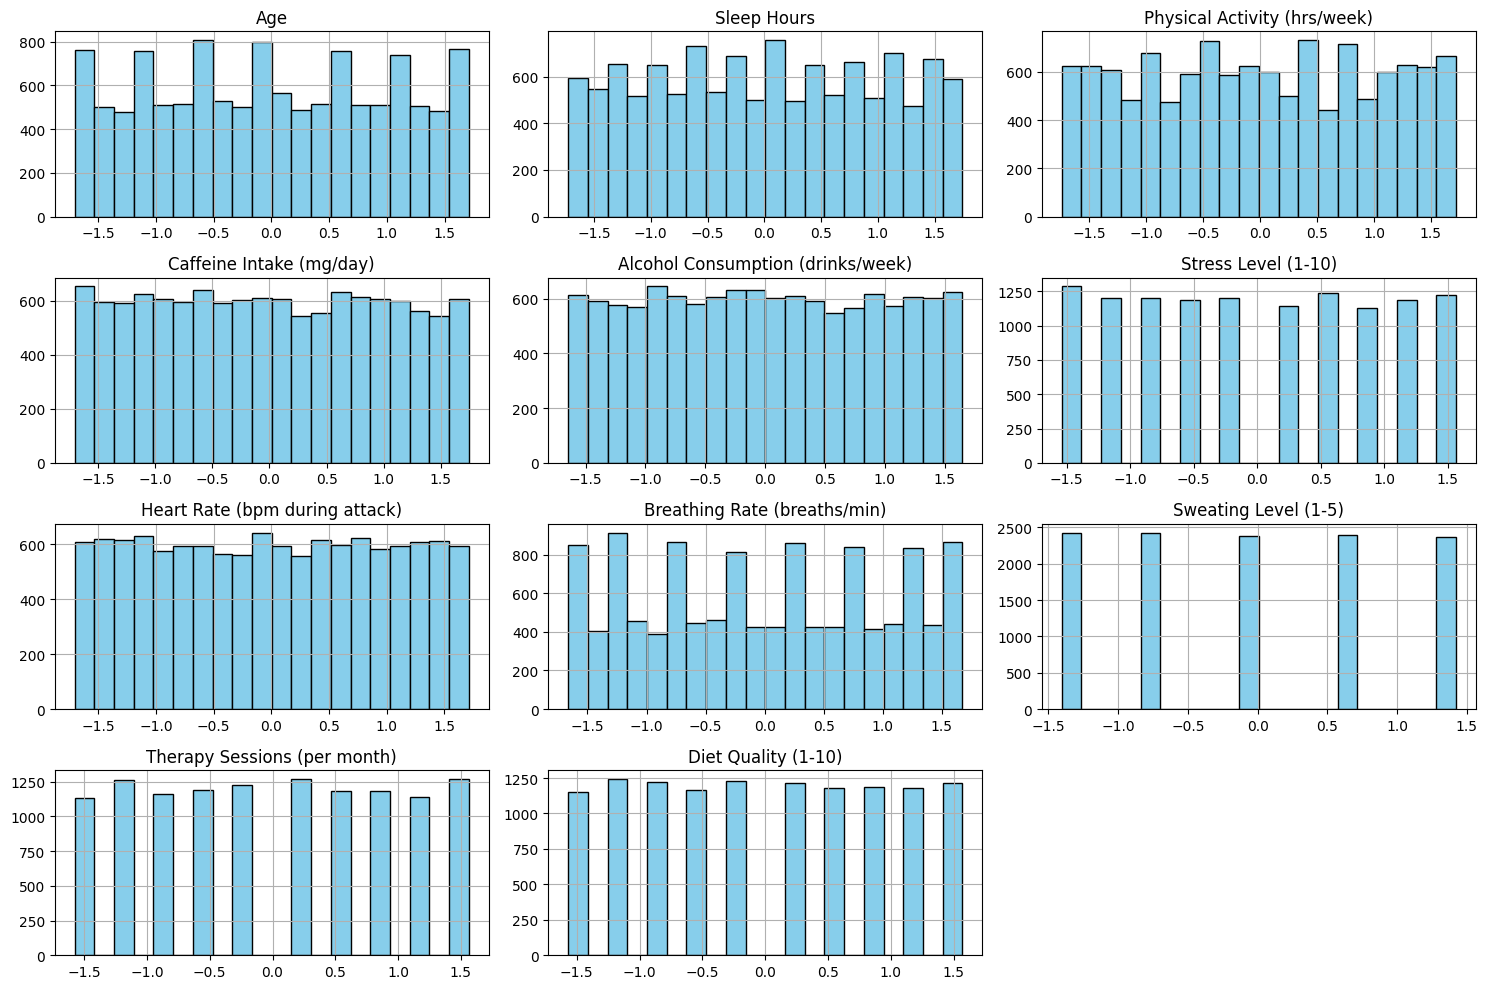

In [ ]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(12, 8))
data[numerical_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

<ipython-input-10-348925a1b14f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


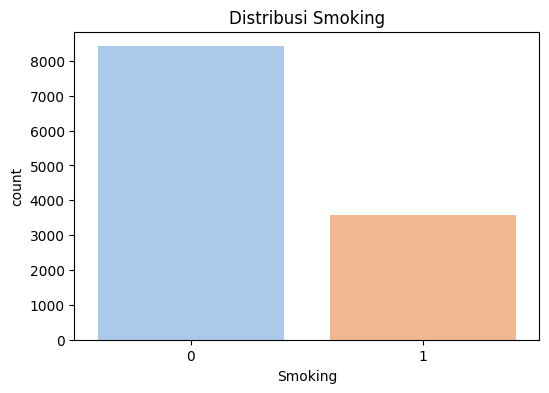

<ipython-input-10-348925a1b14f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


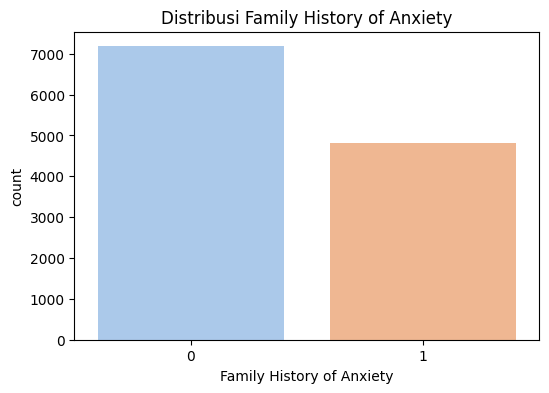

<ipython-input-10-348925a1b14f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


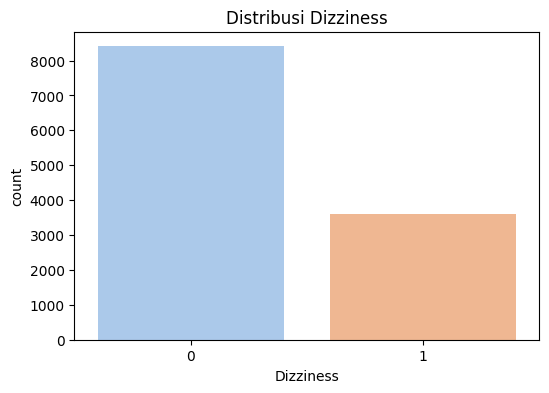

<ipython-input-10-348925a1b14f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


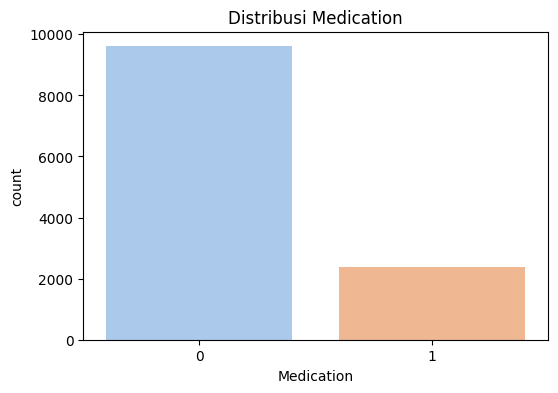

<ipython-input-10-348925a1b14f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


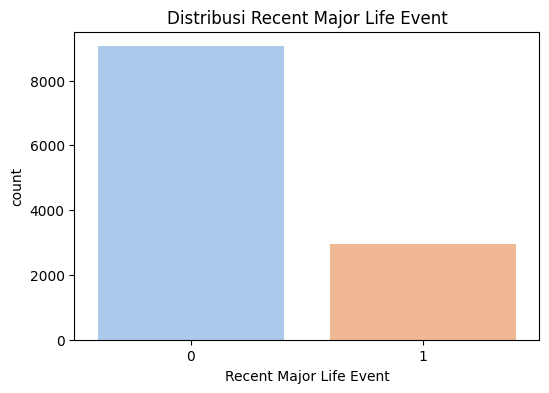

In [ ]:
#Visualisasi distribusi fitur kategorikal
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, palette='pastel')
    plt.title(f"Distribusi {col}")
    plt.show()

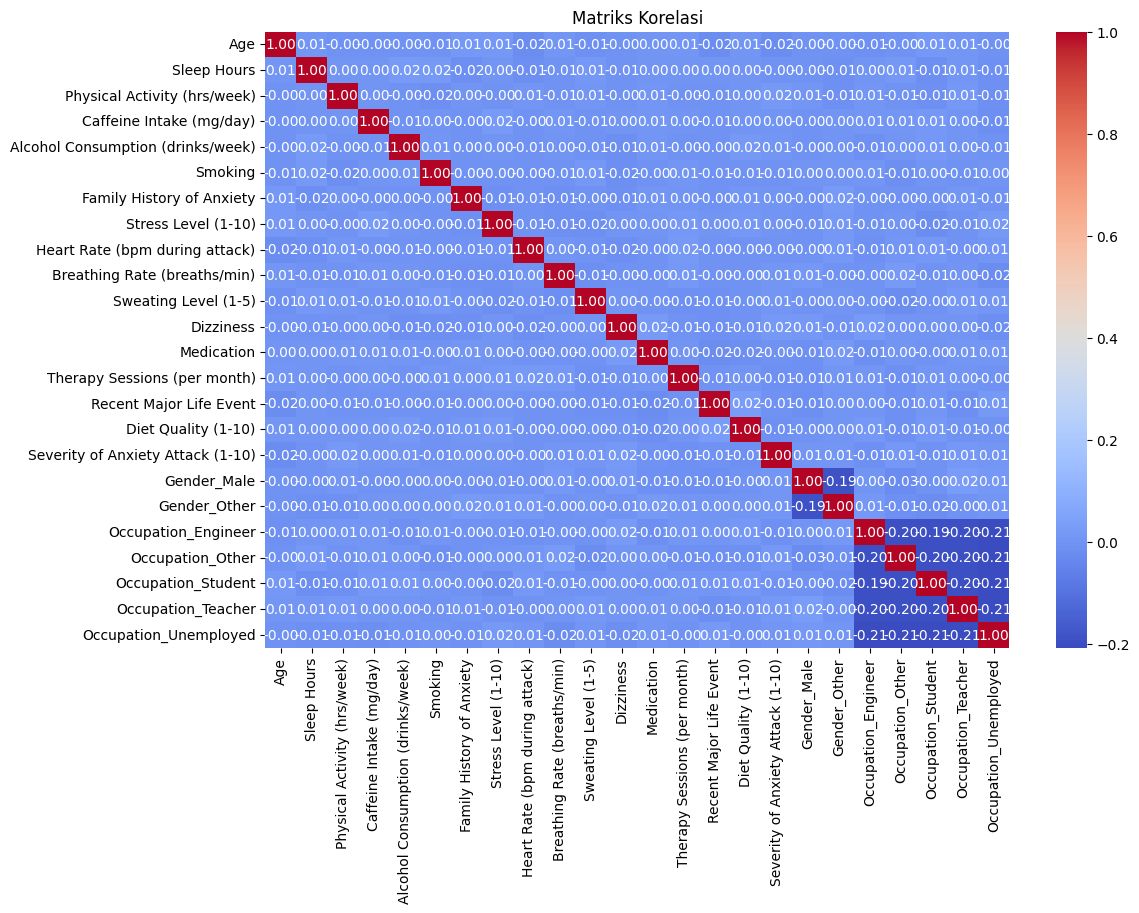

In [ ]:
#Heatmap Korelasi
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()



> seleksi fitur



In [ ]:
# Menggunakan Feature Importance dari Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

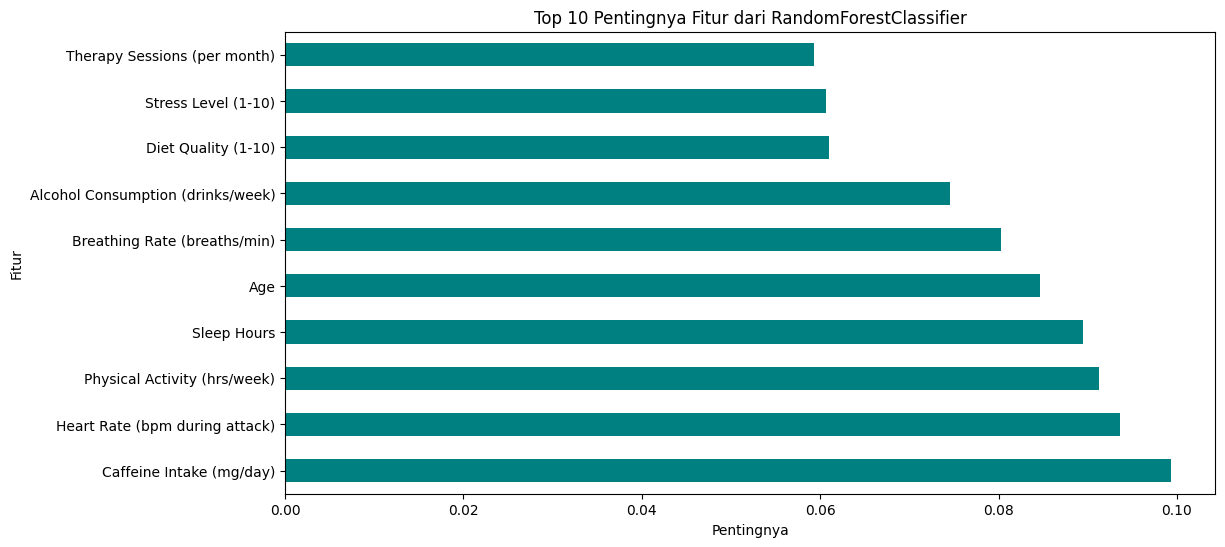

In [ ]:
# Menampilkan pentingnya fitur
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Pentingnya Fitur dari RandomForestClassifier")
plt.xlabel("Pentingnya")
plt.ylabel("Fitur")
plt.show()

In [ ]:
#Seleksi Fitur menggunakan SelectKBest dengan ANOVA F-value
k_best_selector = SelectKBest(score_func=f_classif, k=10)
X_new = k_best_selector.fit_transform(X_train, y_train)
selected_features = X.columns[k_best_selector.get_support()]

print("Top 10 Fitur Terpilih menggunakan ANOVA F-value:")
print(selected_features)

Top 10 Fitur Terpilih menggunakan ANOVA F-value:
Index(['Age', 'Physical Activity (hrs/week)',
       'Alcohol Consumption (drinks/week)', 'Family History of Anxiety',
       'Stress Level (1-10)', 'Dizziness', 'Therapy Sessions (per month)',
       'Recent Major Life Event', 'Occupation_Engineer', 'Occupation_Teacher'],
      dtype='object')




> Membangun Model Klasifikasi dengan RandomForestClassifier



In [ ]:
# Membuat pipeline preprocessing dan model
model_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', 'passthrough', [col for col in X.columns if col not in numerical_cols])
        ])),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:
#Melatih Model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep Hours',
                                                   'Physical Activity '
                                                   '(hrs/week)',
                                                   'Caffeine Intake (mg/day)',
                                                   'Alcohol Consumption '
                                                   '(drinks/week)',
                                                   'Stress Level (1-10)',
                                                   'Heart Rate (bpm during '
                                                   'attack)',
                                                   'Breathing Rate '
                                                   '(breaths/min)',
                                                   'Sweating Level (1-5)',
                                                   'Therapy Sessions (per '
                                                   'month)',
                                                   'Diet Quality (1-10)']),
                                                 ('cat', 'passthrough',
                                                  ['Smoking',
                                                   'Family History of Anxiety',
                                                   'Dizziness', 'Medication',
                                                   'Recent Major Life Event',
                                                   'Gender_Male',
                                                   'Gender_Other',
                                                   'Occupation_Engineer',
                                                   'Occupation_Other',
                                                   'Occupation_Student',
                                                   'Occupation_Teacher',
                                                   'Occupation_Unemployed'])])),
                ('classifier', RandomForestClassifier(random_state=42))])